In [1]:
pip install textblob matplotlib

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
     -- ---------------------------------- 41.0/636.8 kB 653.6 kB/s eta 0:00:01
     --------- ---------------------------- 153.6/636.8 kB 1.5 MB/s eta 0:00:01
     ---------------- --------------------- 276.5/636.8 kB 1.9 MB/s eta 0:00:01
     ------------------ ------------------- 307.2/636.8 kB 2.1 MB/s eta 0:00:01
     --------------------------------- ---- 563.2/636.8 kB 2.5 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install nltk

In [23]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [39]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [43]:
import re
import string
import pandas as pd
import jieba
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from nltk import pos_tag
from textblob import TextBlob

# 讀取文本文件
with open('tp.txt', 'r', encoding='utf-8') as file:
    text_content = file.read()

# 移除中英文以外的字符
pattern = r'[^A-Za-z\u4e00-\u9fa5]+'
text_content = re.sub(pattern, '', text_content)

# 使用jieba進行中文分詞
seg_list = jieba.cut(text_content, cut_all=False)
text_content = ' '.join(seg_list)

# 使用TextBlob進行情感分析
blob = TextBlob(text_content)

# 使用nltk的pos_tag獲取詞性
pos_tags = pos_tag(blob.words)

# 計算詞性比例
pos_counts = {}
total_words = len(pos_tags)
for word, pos in pos_tags:
    pos_counts[pos] = pos_counts.get(pos, 0) + 1

pos_ratios = {pos: count / total_words for pos, count in pos_counts.items()}
print('POS Ratios:', pos_ratios)

# 生成長條圖
fig_bar = px.bar(x=list(pos_ratios.keys()), y=list(pos_ratios.values()), labels={'x': 'POS', 'y': 'Ratio'})
fig_bar.update_layout(title='POS Ratio Bar Chart')
fig_bar.show()


POS Ratios: {'JJ': 0.002325581395348837, 'NNP': 0.9842192691029901, 'VBD': 0.00016611295681063124, 'VBZ': 0.000664451827242525, 'VBP': 0.0009966777408637873, 'NN': 0.008970099667774087, 'VBG': 0.0003322259136212625, 'MD': 0.0004983388704318936, 'VB': 0.0004983388704318936, 'NNS': 0.0011627906976744186, 'PRP': 0.00016611295681063124}


In [ ]:
詞性英文參考資料：https://www.ibm.com/docs/zh/wca/3.5.0?topic=analytics-part-speech-tag-sets

findfont: Generic family 'sans-serif' not found because none of the following families were found: AdobeFanHeitiStd-Bold.otf
findfont: Generic family 'sans-serif' not found because none of the following families were found: AdobeFanHeitiStd-Bold.otf
findfont: Generic family 'sans-serif' not found because none of the following families were found: AdobeFanHeitiStd-Bold.otf
findfont: Generic family 'sans-serif' not found because none of the following families were found: AdobeFanHeitiStd-Bold.otf
findfont: Generic family 'sans-serif' not found because none of the following families were found: AdobeFanHeitiStd-Bold.otf
findfont: Generic family 'sans-serif' not found because none of the following families were found: AdobeFanHeitiStd-Bold.otf
findfont: Generic family 'sans-serif' not found because none of the following families were found: AdobeFanHeitiStd-Bold.otf
findfont: Generic family 'sans-serif' not found because none of the following families were found: AdobeFanHeitiStd-Bold.otf


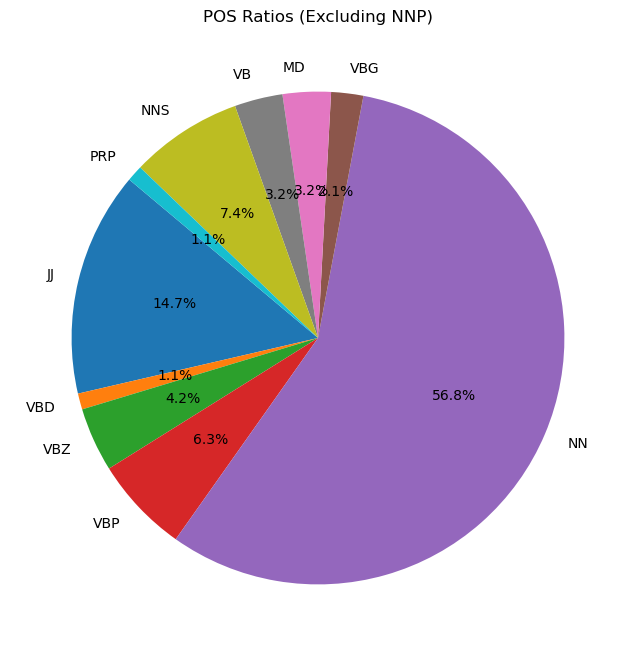

In [44]:
import matplotlib.pyplot as plt

# 你提供的詞性比例字典
pos_ratios = {'JJ': 0.002325581395348837, 'NNP': 0.9842192691029901, 'VBD': 0.00016611295681063124,
              'VBZ': 0.000664451827242525, 'VBP': 0.0009966777408637873, 'NN': 0.008970099667774087,
              'VBG': 0.0003322259136212625, 'MD': 0.0004983388704318936, 'VB': 0.0004983388704318936,
              'NNS': 0.0011627906976744186, 'PRP': 0.00016611295681063124}

# 排除 'NNP' 的詞性
filtered_pos_ratios = {pos: ratio for pos, ratio in pos_ratios.items() if pos != 'NNP'}

# 製作圓餅圖
plt.figure(figsize=(8, 8))
plt.pie(filtered_pos_ratios.values(), labels=filtered_pos_ratios.keys(), autopct='%1.1f%%', startangle=140)
plt.title('POS Ratios (Excluding NNP)')
plt.show()

In [55]:
# 移除中文以外的字符
pattern = r'[^\u4e00-\u9fa5]+'
text_content = re.sub(pattern, '', text_content)

# 使用jieba進行中文分詞
seg_list = jieba.cut(text_content, cut_all=False)
text_content = ''.join(seg_list)

# 移除一些常見的中文停用詞
stopwords = ["的", "在", "是", "與", "對", "於", "而", "了", "也", "為", "或"]
text_content = ''.join([word for word in text_content if word not in stopwords])

In [54]:
from collections import Counter

# 以兩個字為一組進行分詞
word_pairs = [text_content[i:i+2] for i in range(0, len(text_content)-1, 2)]

# 使用 Counter 進行統計
word_pairs_counter = Counter(word_pairs)

# 取出前 10 項
top_10_word_pairs = word_pairs_counter.most_common(10)

# 顯示結果
print('Top 10 Word Pairs:', top_10_word_pairs)

Top 10 Word Pairs: [('教育', 69), ('主義', 52), ('概念', 37), ('哲學', 37), ('分析', 34), ('經驗', 34), ('理論', 19), ('思想', 18), ('觀念', 18), ('理性', 17)]


findfont: Generic family 'sans-serif' not found because none of the following families were found: AdobeFanHeitiStd-Bold.otf
findfont: Generic family 'sans-serif' not found because none of the following families were found: AdobeFanHeitiStd-Bold.otf
findfont: Generic family 'sans-serif' not found because none of the following families were found: AdobeFanHeitiStd-Bold.otf
findfont: Generic family 'sans-serif' not found because none of the following families were found: AdobeFanHeitiStd-Bold.otf
findfont: Generic family 'sans-serif' not found because none of the following families were found: AdobeFanHeitiStd-Bold.otf
findfont: Generic family 'sans-serif' not found because none of the following families were found: AdobeFanHeitiStd-Bold.otf
findfont: Generic family 'sans-serif' not found because none of the following families were found: AdobeFanHeitiStd-Bold.otf
findfont: Generic family 'sans-serif' not found because none of the following families were found: AdobeFanHeitiStd-Bold.otf


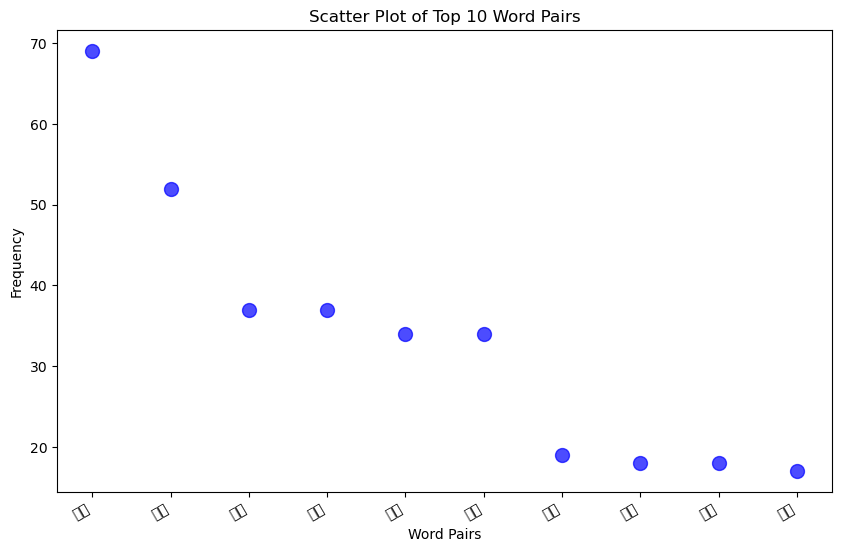

In [68]:
# 提取詞彙和頻率
words, frequencies = zip(*top_10_word_pairs)

# 繪製點狀分布圖
plt.figure(figsize=(10, 6))
plt.scatter(words, frequencies, s=100, c='blue', alpha=0.7)
plt.title('Scatter Plot of Top 10 Word Pairs')
plt.xlabel('Word Pairs')
plt.ylabel('Frequency')
plt.xticks(rotation=30, ha='right')  # 使 x 軸標籤斜向顯示，以免重疊
plt.show()